<div style="text-align:center">
  <img src="https://github.com/floresernesto95/Images/blob/main/Sentiment%20analysis%20100.png?raw=true" alt="Centered and Resized Image" width="600" height="400">
</div>

> # **Description**

Sentiment analysis aims to determine a writer’s attitude toward a topic or the overall contextual polarity of a document. This attitude can manifest as a judgment, assessment, emotional state, or intended emotional communication.

In sentiment analysis, the primary task involves identifying opinion words, which holds significant importance. Opinion words serve as dominant indicators of feelings, typically encompassing adjectives, adverbs, and verbs. For instance, consider the statement: “I love this camera. It’s amazing!”

These opinion words are also referred to as polarity words, sentiment words, opinion lexicon, or simply opinions. They can generally be categorized into two types: positive words, such as wonderful, elegant, astonishing; and negative words, like horrible, disgusting, poor.

> # **Setup**

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv("/kaggle/input/imdb-movie-ratings-sentiment-analysis/movie.csv")

> # **Data exploration**

In [71]:
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


- **Notes**

    We start seeing the head, tail and shape of the dataframe.

In [72]:
df.sample(20)

,text,label
22803,1) If you want to make a movie that deals with...,0
19105,"I watch a lot of movies - DVD, features, and c...",1
36031,"Some might scoff, but there is actually a real...",0
681,When it comes to Paul Verhoeven and erotic thr...,1
39423,....and now I'm up to episode #7. I really was...,0
34379,This Hong Kong filmed potboiler packs in more ...,1
11332,"The plot starts out interesting, however, towa...",1
13013,"Moe and Larry are newly henpecked husbands, ha...",1
39733,"""Eagle's Wing"" is a pleasant surprise of a mov...",1
31466,"""Spaced Invaders"" is one of the funniest movie...",1


- **Notes**

    Then, we display random rows from the dataframe, which provide information of the different data points, helping to understand the variability in it.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


- **Notes**

    Show if there are any null values. E.g. if text had 39500 non-null values, knowing the shape of the dataframe, we could assume that there are 500 null values.
    
    In thise case there are not.

In [74]:
df.nunique()

text     39723
label        2
dtype: int64

- **Notes**

    Show unique values for each column of the dataframe. 
    
    Based on there being no null values and what the text column shows, we can assume there are duplicate values.

In [75]:
df.duplicated().sum()

277

> # **Data analysis**

In [8]:
from wordcloud import WordCloud

In [9]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

- **Notes**

    This line of code calculates the word count for each review and appends this count as a new column named 'word_count', intended for plotting a histogram.

In [10]:
def plot_target_hist(df, col):
    outcome_counts = df[col].value_counts()
    total = outcome_counts.sum()
    outcome_percentages = outcome_counts / total * 100

    out_hist = outcome_counts.plot(kind='bar', figsize=(3.5, 3.5))
    plt.xticks(rotation=0, fontsize=9)
    plt.yticks(range(0, max(outcome_counts) + 1, 5000), fontsize=9)
    plt.xlabel(None)

    for i, percentage in enumerate(outcome_percentages):
        plt.text(i, outcome_counts[i], f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)

    plt.show()

In [11]:
def plot_col_hist(df, col):
    plt.figure(figsize=(14, 3.5))
    plt.hist(df[df['label'] == 1][col], bins=50, alpha=0.6, color='#1F77B4', label='1')
    plt.hist(df[df['label'] == 0][col], bins=50, alpha=0.6, color='#D62728', label='0')
    plt.tick_params(labelsize=9)
    plt.xticks(range(0, max(df[col])+1, 250))
    plt.legend(fontsize=8)
    plt.show()

In [27]:
def plot_word_cloud(df, lbl):
    figsize=(14.7, 7.35)
    
    text = ' '.join(df[df['label'] == lbl]['text'])
    wordcloud = WordCloud(width=int(figsize[0]*100), height=int(figsize[1]*100), background_color='black').generate(text)

    plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

- **Notes**

    We create functions to display the histograms and word clouds.

> ## **Univariate analysis**

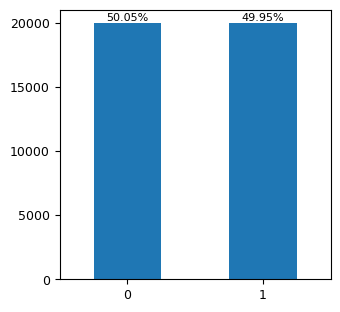

In [13]:
plot_target_hist(df, 'label')

- **Notes**

    In the case of a classification problem we always need to check the target distribution.
    
    Here is balanced in a 1:1 ratio for Negative:Positive cases, it will not be necesary to stratify the samples. 
   
- **Stratify**

    This parameter is often used in functions like train_test_split to ensure that the distribution of target classes is maintained in both the training and testing datasets.
    
    When you split a dataset into training and testing sets, it's important to ensure that each subset is representative of the overall distribution of the data, especially when dealing with imbalanced datasets.

> ## **Multivariate analysis**

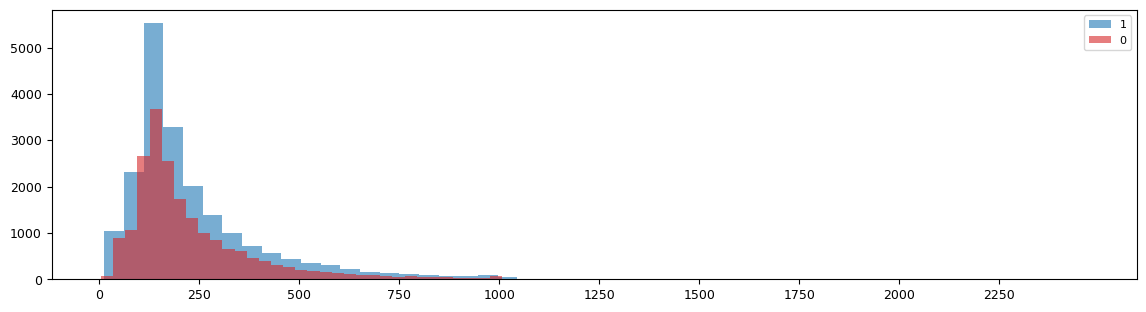

In [14]:
plot_col_hist(df, 'word_count')

- **Notes**

    The histogram shows that most reviews are between 100 and 250 words, with a peak around 150 words, and a decrease in frequency as the number of words increases. Also, positive comments are larger in general.

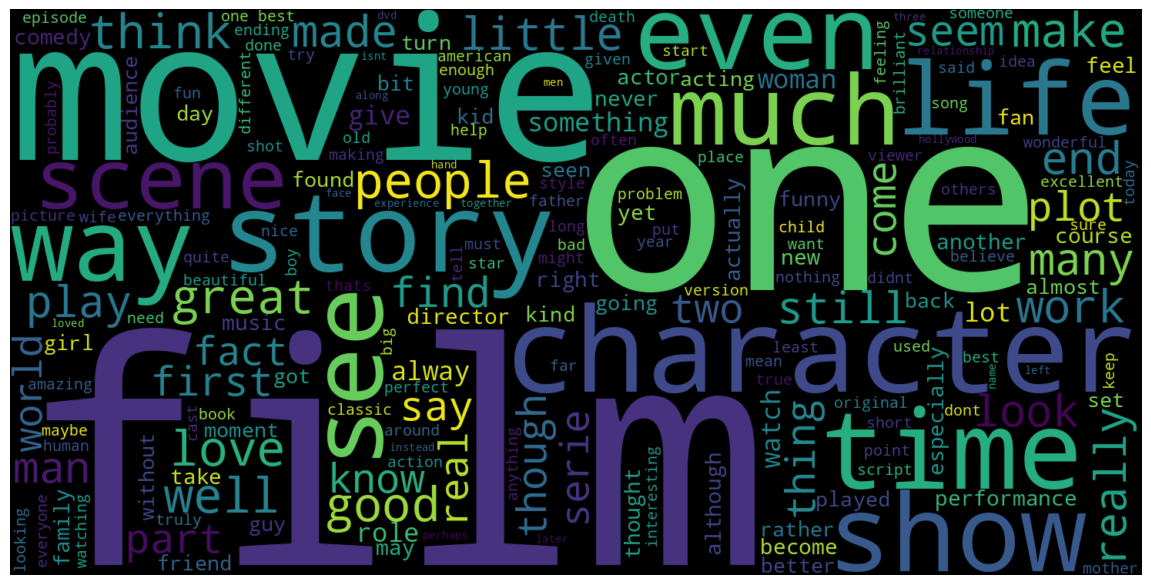

In [28]:
plot_word_cloud(df, 1)

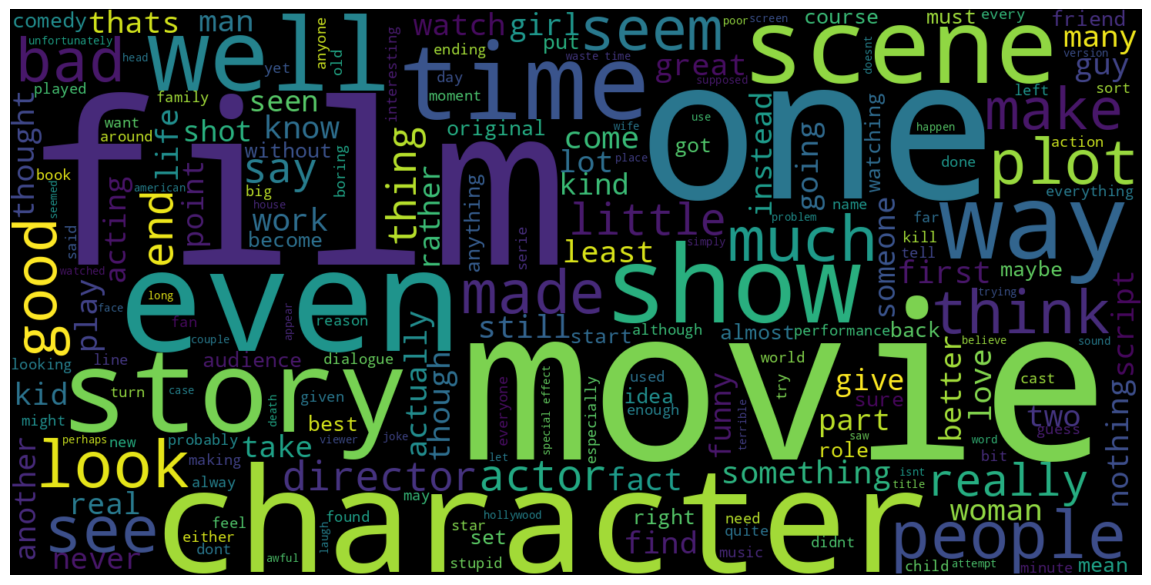

In [29]:
plot_word_cloud(df, 0)

> # **Data preprocessing**

In [43]:
import subprocess
import re
import string 
import nltk

try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')
    
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /kaggle/working/corpora/wordnet.zip


replace /kaggle/working/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


- **Notes**

    This code prepares NLTK for text processing tasks by checking for and downloading the WordNet dataset if needed. It then sets the NLTK data path and imports modules for accessing common english stopwords and lemmatizing words.

In [44]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [45]:
def preprocess_data(text):
    stopwords_set = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stopwords_set)
    
    lemma = WordNetLemmatizer()
    text = ' '.join(lemma.lemmatize(word) for word in text.split())
    
    text = ' '.join(word for word in text.split() if len(word) > 2)
    return text

- **Notes**

    The first function converts text to lowercase and removes URLs and punctuation using regular expressions, while the second function refines the text by removing stopwords, lemmatizing words, and filtering out short ones. Together, these functions prepare text data for natural language processing tasks by reducing noise and standardizing formats.
    
- **Stopwords**

    Stopwords are common, insignificant words like "the" and "is" often filtered out in NLP tasks. Their removal focuses analysis on more meaningful words, boosting accuracy and efficiency.
    
- **Lemmatization**

    Lemmatization simplifies words to their base forms, ensuring they exist in the language's dictionary. For example, "running" becomes "run" and "better" becomes "good". In NLP, it standardizes words, reducing data complexity and improving analysis accuracy.

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df['clean_text'] = df['text'].apply(clean_text)    
df['final_text'] = df['clean_text'].apply(preprocess_data)

In [48]:
df = df[['text', 'clean_text', 'final_text', 'label']]
pd.set_option('display.max_colwidth', None)
pd.DataFrame(df.iloc[1]).transpose()

,text,clean_text,final_text,label
1,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, but the animation in particular is a sad sight. The storyline is also pretty weak, as its more like three episodes of Schooby-Doo than the single adventurous story we got the last time. But dont misunderstand, it's not very good Schooby-Doo episodes. I didnt laugh a single time, although I might have sniggered once or twice.<br /><br />To the audience who haven't seen the first movie, or don't especially care for a similar sequel, here is a fast review of this movie as a stand-alone product: If you liked schooby-doo, you might like this movie. If you didn't, you could still enjoy this movie if you have nothing else to do. And I suspect it might be a good kids movie, but I wouldn't know. It might have been better if Milo's Return had been a three-episode series on a cartoon channel, or on breakfast TV.",when i put this movie in my dvd player and sat down with a coke and some chips i had some expectations i was hoping that this movie would contain some of the strongpoints of the first movie awsome animation good flowing story excellent voice cast funny comedy and a kickass soundtrack but to my disappointment not any of this is to be found in atlantis milos return had i read some reviews first i might not have been so let down the following paragraph will be directed to those who have seen the first movie and who enjoyed it primarily for the points mentionedwhen the first scene appears your in for a shock if you just picked atlantis milos return from the displaycase at your local videoshop or whatever and had the expectations i had the music feels as a bad imitation of the first movie and the voice cast has been replaced by a not so fitting one with the exception of a few characters like the voice of sweet the actual drawings isnt that bad but the animation in particular is a sad sight the storyline is also pretty weak as its more like three episodes of schoobydoo than the single adventurous story we got the last time but dont misunderstand its not very good schoobydoo episodes i didnt laugh a single time although i might have sniggered once or twiceto the audience who havent seen the first movie or dont especially care for a similar sequel here is a fast review of this movie as a standalone product if you liked schoobydoo you might like this movie if you didnt you could still enjoy this movie if you have nothing else to do and i suspect it might be a good kids movie but i wouldnt know it might have been better if milos return had been a threeepisode series on a cartoon channel or on breakfast tv,put movie dvd player sat coke chip expectation hoping movie would contain strongpoints first movie awsome animation good flowing story excellent voice cast funny comedy kickass soundtrack disappointment found atlantis milo return read review first might let following paragraph directed seen first movie enjoyed primarily point mentionedwhen first scene appears shock picked atlantis milo return displaycase local videoshop w

> # **Train models**

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_score, KFold

In [50]:
def get_models():
    models = []
    models.append(('NB', ComplementNB()))
    return models

In [51]:
def train_models(X_train, y_train, models):
    n_splits = 10
    scoring = 'accuracy'

    results = []
    names = []

    for name, model in models:
        cv_results = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=n_splits), scoring=scoring)
        results.append(cv_results)
        names.append(name)
        mean_accuracy = "{:.4f}".format(cv_results.mean())
        msg = f"{name}: {mean_accuracy}"
        print(msg)

    return names, results

- **Notes**

    This function conducts cross-validation using cross_val_score for each model and displays the mean accuracy and standard deviation across folds.
    
- **Cross-validation** 

    Statistical technique to assess a machine learning model's performance and prevent overfitting. It divides the dataset into subsets, trains the model on some and evaluates on the rest. This process repeats multiple times, and the performance metrics are averaged across folds for a comprehensive evaluation.

In [52]:
tfidf = TfidfVectorizer(lowercase=False)

X = tfidf.fit_transform(df.text)
y = df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

<39723x118017 sparse matrix of type '<class 'numpy.float64'>'
	with 5627686 stored elements in Compressed Sparse Row format>

- **Notes**

    This code utilizes the TF-IDF technique to convert the 'text' column into a numerical representation, which is stored in X. The 'label' column is stored in y. Then it splits the data into training and testing sets, this practice enables the evaluation of model performance on unseen data, preventing overfitting by identifying instances where the model memorizes the training data without capturing the underlying patterns; a random state is set to ensure reproducibility.
        
- **TF-IDF**

    Technique that assigns numerical weights to words based on their importance in a document. It combines Term Frequency (TF), measuring how often a term appears in a document, with Inverse Document Frequency (IDF), which accounts for how rare a term is across all documents in a corpus. The resulting score reflects both local and global significance, highlighting words that are frequent in a document but rare across the corpus. 

In [53]:
models = get_models()
names, results = train_models(X_train, y_train, models)

NB: 0.8645


- **Notes**

    The accuracy score suggests that the Naive Bayes model performs well.

> # **Algorithm Tuning**

In [54]:
import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [55]:
class OptunaSearch(object):
    def __init__(self, X_train, y_train, model, hyperparameters):
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
    
    def objective(self, trial):
        params = {param_name: trial.suggest_categorical(param_name, param_values) 
                  for param_name, param_values in self.hyperparameters.items()}
        
        self.model.set_params(**params)        
        cv_scores = cross_val_score(self.model, self.X_train, self.y_train, cv=10, n_jobs=-1)        
        return cv_scores.mean()
    
    def BestModelPredict(self, X_test, n_trials=100):
        optuna.logging.set_verbosity(optuna.logging.WARNING)
        study = optuna.create_study(direction="maximize")
        study.optimize(self.objective, n_trials=n_trials)
        
        best_params = study.best_params
        self.model.set_params(**best_params)
        self.model.fit(self.X_train, self.y_train)        
        pred = self.model.predict(X_test)
        best_score = study.best_value
        print("Best score: {} using parameters: {}".format(best_score, best_params))
        return self.model, pred

In [56]:
class GridSearch(object):
    def __init__(self, X_train, y_train, model, hyperparameters):
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
    
    def GridSearch(self):
        cv = 10 
        clf = GridSearchCV(self.model, self.hyperparameters, cv=cv, verbose=0, n_jobs=-1,)
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))
        return best_model, best_model.best_params_
    
    def BestModelPridict(self, X_test):
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return best_model, pred

- **Notes**

    We define two classes for hyperparameter tuning using optuna and grid search.
    
- **Hyperparameter tuning**

    Process of identifying the optimal configuration of hyperparameters for a machine learning model to enhance its performance on a specific dataset. Hyperparameters are configuration settings that are predefined before training and are not directly learned from the data.
    
    Methods:
    
    - Optuna: employs Sequential Model-based Optimization (SMBO) to efficiently explore the hyperparameter space, learning from past trials to select promising configurations. It outperforms Grid Search and Random Search by dynamically focusing on promising areas and supports early stopping. However, it requires more setup than simpler methods.
     
    - Grid search: evaluates all possible combinations of hyperparameter values within a specified grid. It can be computationally expensive, making it suitable for scenarios where the hyperparameter space is relatively small and computational resources permit an exhaustive search.

In [57]:
nb_model = ComplementNB()

hyperparameters = {'alpha': [0.1, 0.5, 1.0],
                   'force_alpha': [True, False],
                   'fit_prior': [True, False], 
                   'class_prior': [None, [0.2, 0.8], [0.5, 0.5]], 
                   'norm': [True, False]}

In [58]:
optuna_search_obj_nb = OptunaSearch(X_train, y_train, nb_model, hyperparameters)
best_model_opt, optuna_search_predictions_nb = optuna_search_obj_nb.BestModelPredict(X_test)
accuracy_optuna_search_nb = accuracy_score(y_test, optuna_search_predictions_nb)
print("Optuna Search Accuracy:", accuracy_optuna_search_nb)

Best score: 0.8643396240243902 using parameters: {'alpha': 1.0, 'force_alpha': False, 'fit_prior': True, 'class_prior': [0.2, 0.8], 'norm': False}
Optuna Search Accuracy: 0.8675896790434235


In [59]:
grid_search_obj_nb = GridSearch(X_train, y_train, nb_model, hyperparameters)
best_model_gs, grid_search_predictions_nb = grid_search_obj_nb.BestModelPridict(X_test)
accuracy_grid_search_nb = accuracy_score(y_test, grid_search_predictions_nb)
print("Grid Search Accuracy:", accuracy_grid_search_nb)

Best: 0.864340 using {'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True, 'norm': False}
Grid Search Accuracy: 0.8675896790434235


- **Notes**

    We define a dictionary containing the values of the hyperparameters to be tuned, followed by the algorithm tuning processes. In this case, both Optuna and Grid Search produce identical results, each improving the previous one by approximately 1 point.

> # **Performance Analysis**

In [60]:
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(3.5, 3.5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 9, "weight": "light"})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')


    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in conf_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(conf_matrix, annot=labels, cmap='Blues', fmt='', cbar=False, annot_kws={"size": 9, "weight": "light"})
    plt.show()

In [61]:
def plot_roc_curve(classifier, X_test, y_test, classifier_name='Classifier'):
    classifier_probs = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, classifier_probs)

    plt.figure(figsize=(3.5, 3.5))
    plt.plot(fpr, tpr, label='ComplementNB')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    roc_auc = roc_auc_score(y_test, classifier_probs)
    print(f'{classifier_name} AUC Score: {roc_auc:.4f}')

In [62]:
classification_report_result = classification_report(y_test, grid_search_predictions_nb)
print("Classification Report:\n", classification_report_result)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      3991
           1       0.88      0.85      0.86      3954

    accuracy                           0.87      7945
   macro avg       0.87      0.87      0.87      7945
weighted avg       0.87      0.87      0.87      7945



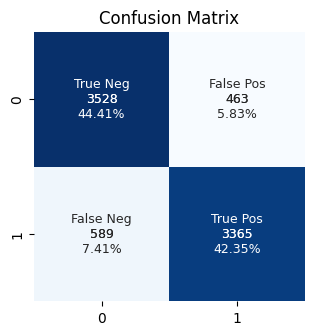

In [63]:
plot_confusion_matrix(y_test, grid_search_predictions_nb)

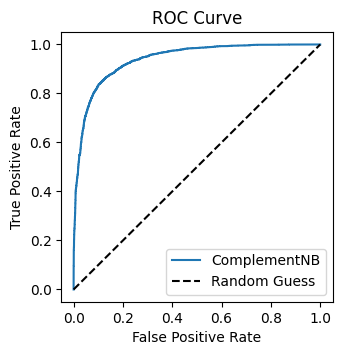

ComplementNB AUC Score: 0.9391


In [64]:
plot_roc_curve(best_model_opt, X_test, y_test, classifier_name='ComplementNB')

- **Notes**

    - Classification report: shows balanced precision, recall, and F1 score for both positive and negative cases, reflecting good overall performance
    
    - Confusion matrix: indicates a high number of true positives and negatives, suggesting successful prediction of positive and negative instances. Additionally, low counts of false positives and negatives imply a balanced performance in avoiding incorrect predictions
    
    - ROC curve: with an area under the curve of 0.9391, showcases the Naive Bayes model's strong ability to differentiate between positive and negative instances

> # **Conclusion**

Our sentiment analysis project effectively utilizes the Naive Bayes classifier to assess sentiment in textual data. With thorough exploration, preprocessing, training, and optimization, we attain balanced precision, recall, and F1 scores. The model's accuracy and sentiment differentiation capability are evidenced by the classification report, confusion matrix, and ROC curve. 

Overall, our project underscores the efficacy of machine learning in sentiment analysis, offering precise insights into textual sentiment.

> # **Extras**

> ## **Prediction function**

In [66]:
def predict_sentiment(comment, model, tfidf):
    comment_list = [comment]
    comment_vector = tfidf.transform(comment_list)
    comment_prediction = model.predict(comment_vector)[0]
    
    if comment_prediction == 1:
        print("Positive comment")
    else:
        print("Negative comment")

clean_comment = clean_text('The dialogue was cringeworthy and cliché-ridden. It"s as if the scriptwriter had never heard human beings speak before')
preprocess_comment = preprocess_data(clean_comment) 
predict_sentiment(preprocess_comment, best_model_opt, tfidf)

Negative comment


> ## **Model serialization**

In [ ]:
import pickle

In [ ]:
with open('/kaggle/working/nb_model.pkl', 'wb') as f:
    pickle.dump(best_model_opt, f)

with open('/kaggle/working/tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)